In [119]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data = pd.read_csv('insurance_claims.csv',sep=',')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [122]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### Dropping Irrelevant Columns


In [123]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

data.drop(to_drop, inplace = True, axis = 1)
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


### Handling Missing Values
#### Replacing '?' with NaN

In [124]:
data.replace('?', np.nan, inplace=True)

In [125]:
data.isnull().sum()


months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

#### To handle missing values, we imputed them with the most frequent value (mode) for each column using the SimpleImputer from scikit-learn

In [126]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = imputer.fit_transform(data)
df = pd.DataFrame(data_imputed, columns=data.columns)

In [127]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [128]:
df.isna().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [129]:
df.nunique()

months_as_customer             391
age                             46
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
fraud_reported                   2
dtype: int64

In [130]:
print("Data types:\n", df.dtypes)

Data types:
 months_as_customer             object
age                            object
policy_csl                     object
policy_deductable              object
policy_annual_premium          object
umbrella_limit                 object
insured_sex                    object
insured_education_level        object
insured_occupation             object
insured_relationship           object
capital-gains                  object
capital-loss                   object
incident_type                  object
collision_type                 object
incident_severity              object
authorities_contacted          object
incident_hour_of_the_day       object
number_of_vehicles_involved    object
property_damage                object
bodily_injuries                object
witnesses                      object
police_report_available        object
total_claim_amount             object
injury_claim                   object
property_claim                 object
vehicle_claim                  object

### Converting Data Types to Numeric

To ensure consistency in data types, we converted certain columns from object to numeric data types. The following numeric columns were identified:


In [131]:
numeric_columns = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 
                   'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries',
                   'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim','policy_annual_premium']

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column])
df.dtypes

months_as_customer               int64
age                              int64
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim            

### Correlation Analysis and Feature Selection


C:\Users\admin\AppData\Local\Temp\ipykernel_26512\800051144.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



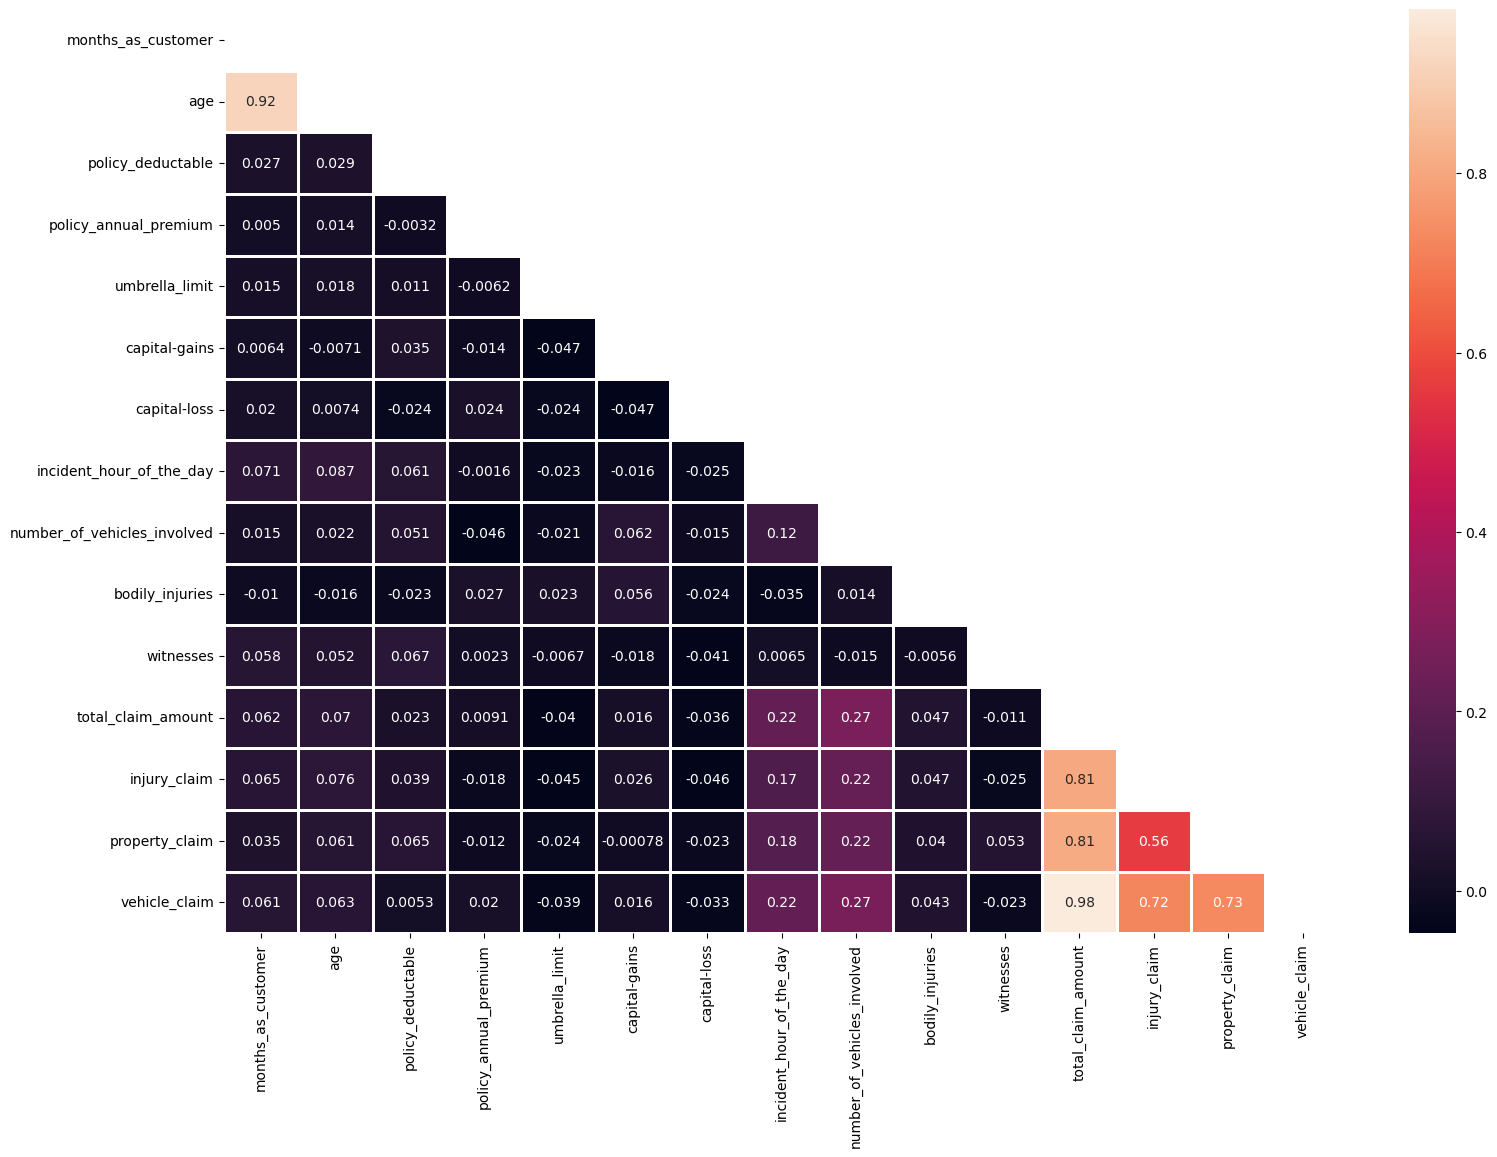

In [132]:
plt.figure(figsize = (18, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()


Observing the heatmap, we noticed high correlation between 'age' and 'months_as_customer', indicating redundancy. Therefore, we decided to drop the 'age' column. Additionally, 'total_claim_amount' showed strong correlation with 'injury_claim', 'property_claim', and 'vehicle_claim'. Since 'total_claim_amount' encompasses these features, we opted to remove it to prevent multicollinearity.


In [133]:
df.drop('age', axis=1, inplace=True)
df.drop('total_claim_amount', axis=1, inplace=True)

In [134]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [135]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [136]:
for column in X.select_dtypes(include=['object']).columns:
    unique_values = X[column].unique()
    print(f"Unique categorical values for column '{column}':")
    print(unique_values)

Unique categorical values for column 'policy_csl':
['250/500' '100/300' '500/1000']
Unique categorical values for column 'insured_sex':
['MALE' 'FEMALE']
Unique categorical values for column 'insured_education_level':
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
Unique categorical values for column 'insured_occupation':
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
Unique categorical values for column 'insured_relationship':
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
Unique categorical values for column 'incident_type':
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
Unique categorical values for column 'collision_type':
['Side Collision' 'Rear Collision' 'Front Collision']
Unique categorical values for column 

### Label Encoding of Categorical Variables


In [137]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(df[column])
for column, encoder in label_encoders.items():
    print(f"Label Encoder for column '{column}':")
    for label, code in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"    {label}: {code}")

Label Encoder for column 'policy_csl':
    100/300: 0
    250/500: 1
    500/1000: 2
Label Encoder for column 'insured_sex':
    FEMALE: 0
    MALE: 1
Label Encoder for column 'insured_education_level':
    Associate: 0
    College: 1
    High School: 2
    JD: 3
    MD: 4
    Masters: 5
    PhD: 6
Label Encoder for column 'insured_occupation':
    adm-clerical: 0
    armed-forces: 1
    craft-repair: 2
    exec-managerial: 3
    farming-fishing: 4
    handlers-cleaners: 5
    machine-op-inspct: 6
    other-service: 7
    priv-house-serv: 8
    prof-specialty: 9
    protective-serv: 10
    sales: 11
    tech-support: 12
    transport-moving: 13
Label Encoder for column 'insured_relationship':
    husband: 0
    not-in-family: 1
    other-relative: 2
    own-child: 3
    unmarried: 4
    wife: 5
Label Encoder for column 'incident_type':
    Multi-vehicle Collision: 0
    Parked Car: 1
    Single Vehicle Collision: 2
    Vehicle Theft: 3
Label Encoder for column 'collision_type':
    Fro

In [138]:
X.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
0,328,1,1000,1406.91,0,1,4,2,0,53300,...,4,5,1,1,1,2,1,6510,13020,52080
1,228,1,2000,1197.22,5000000,1,4,6,2,0,...,4,8,1,0,0,0,0,780,780,3510
2,134,0,2000,1413.14,5000000,0,6,11,3,35100,...,4,7,3,0,2,3,0,7700,3850,23100
3,256,1,2000,1415.74,6000000,0,6,1,4,48900,...,4,5,1,0,1,2,0,6340,6340,50720
4,228,2,1000,1583.91,6000000,1,0,11,4,66000,...,2,20,1,0,0,1,0,1300,650,4550


### Outlier Detection

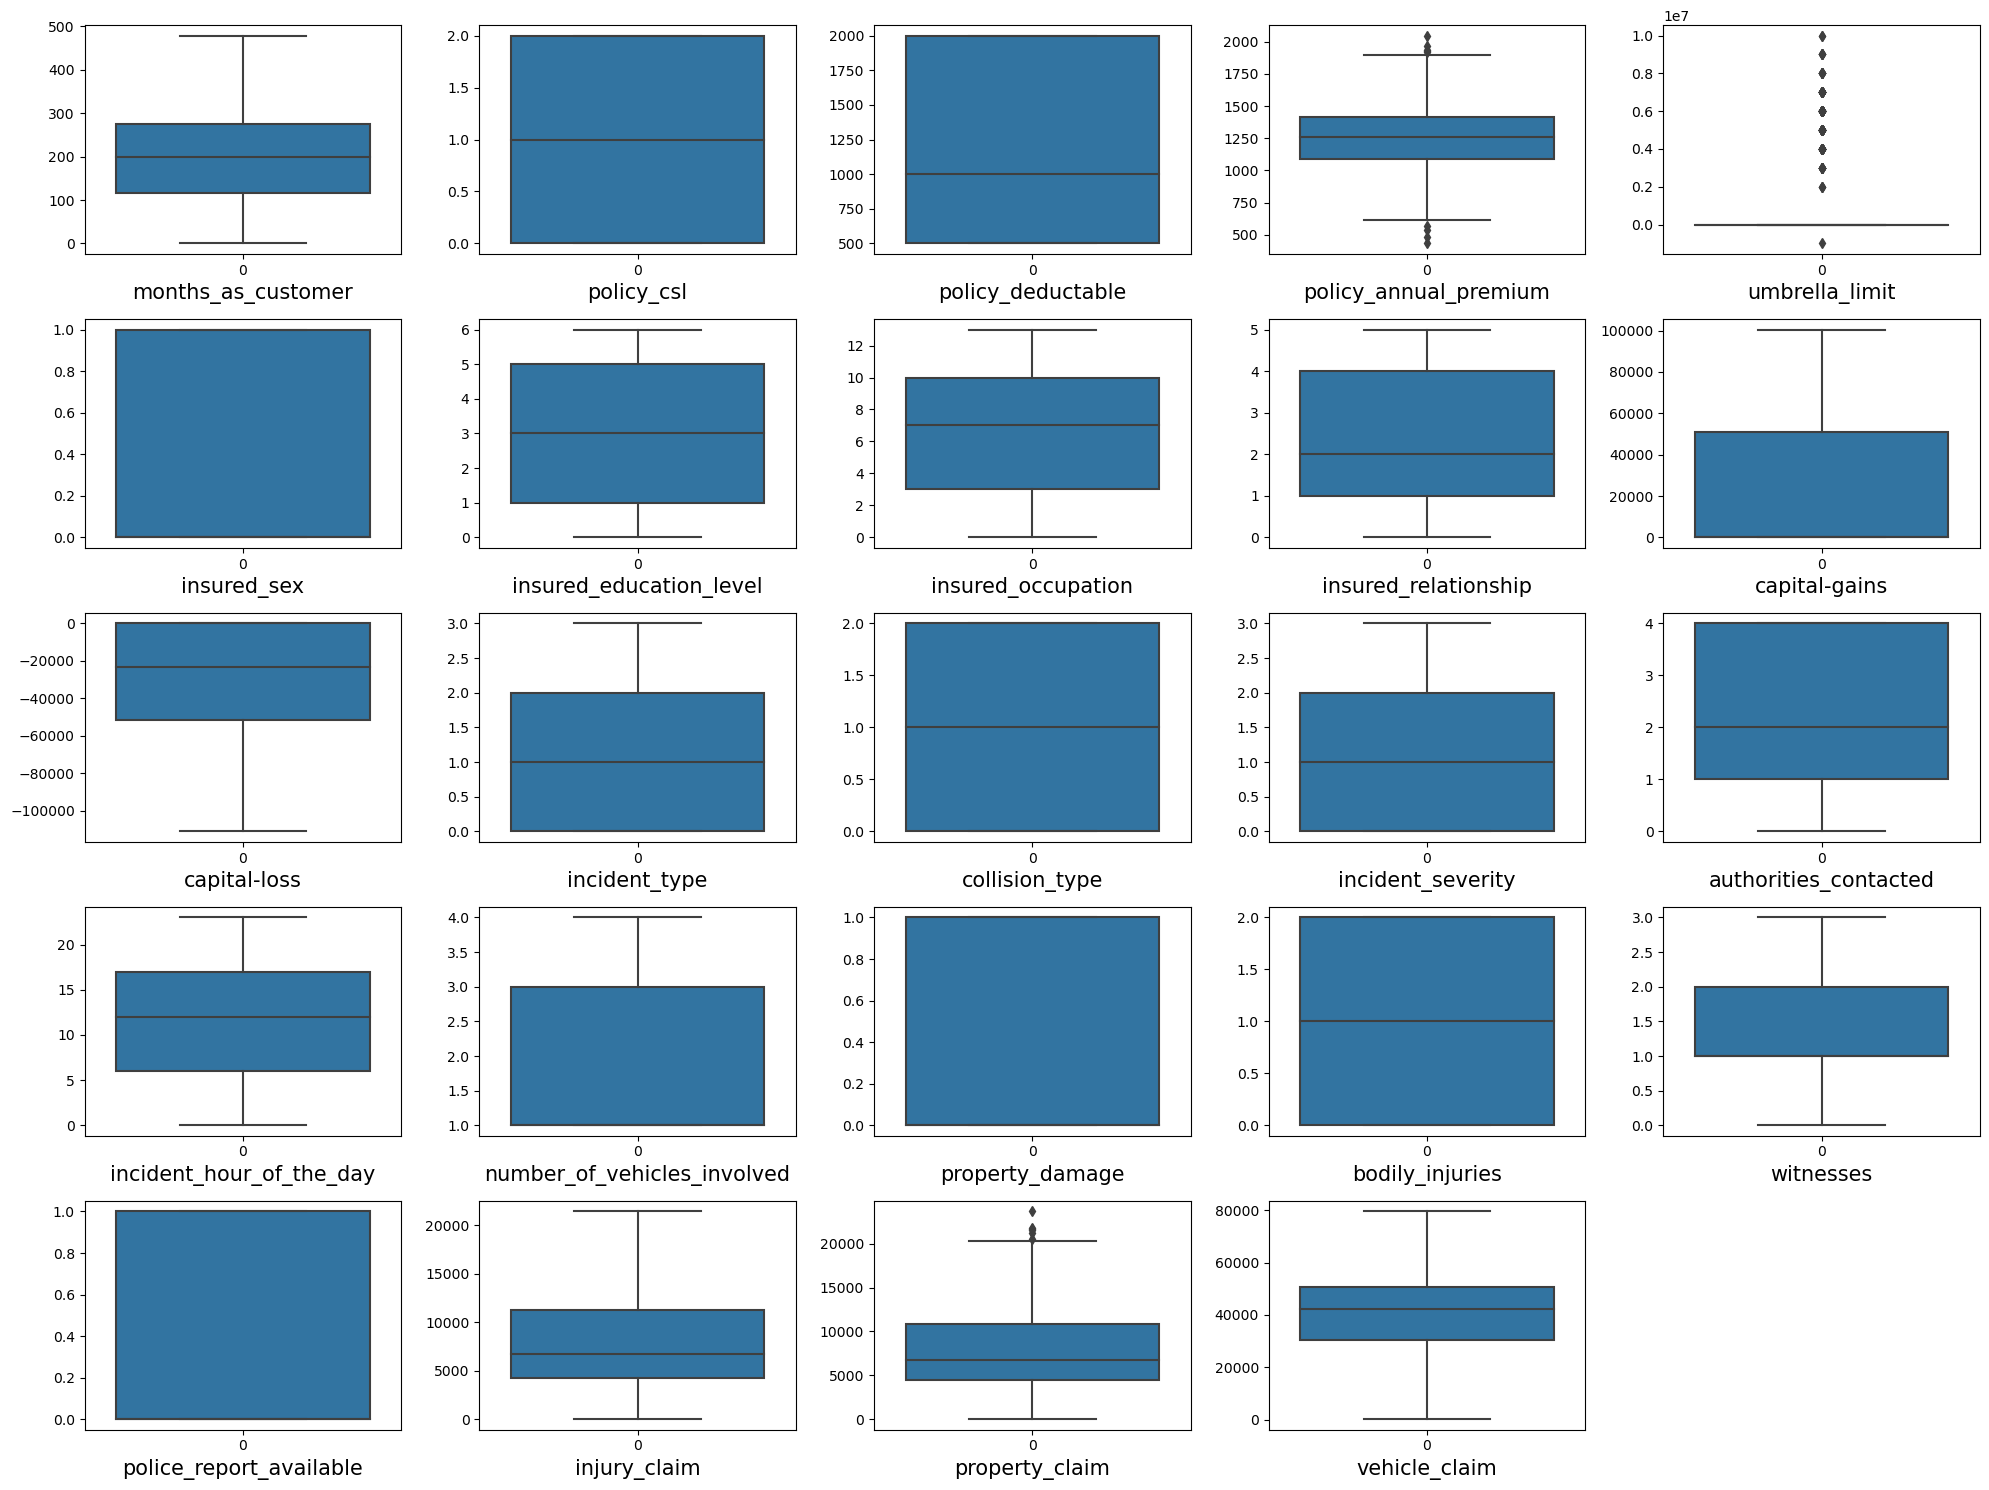

In [139]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

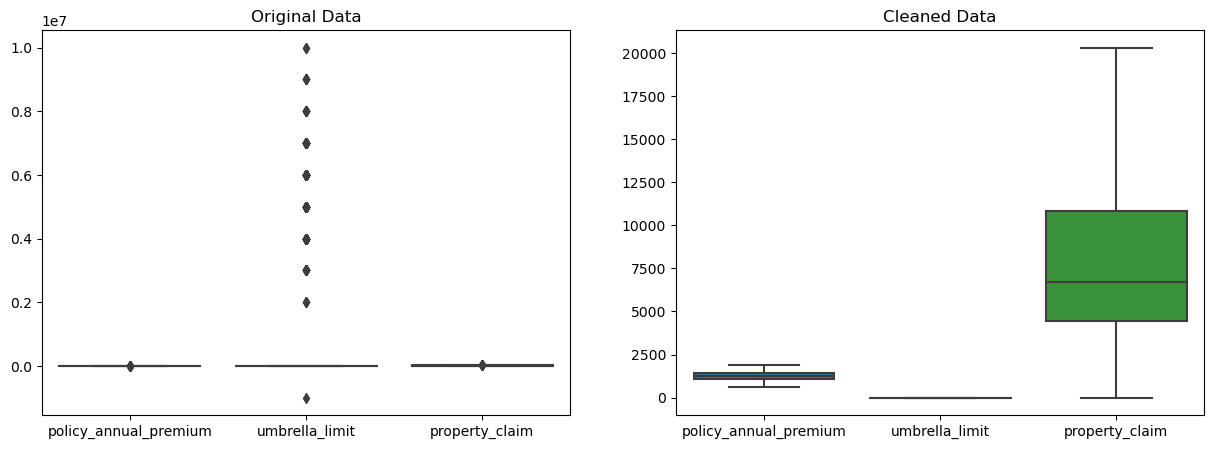

In [140]:
from scipy.stats import zscore, mstats
from sklearn.impute import SimpleImputer

np.random.seed(0)

Q1 = data[['policy_annual_premium', 'umbrella_limit', 'property_claim']].quantile(0.25)
Q3 = data[['policy_annual_premium', 'umbrella_limit', 'property_claim']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[['policy_annual_premium', 'umbrella_limit', 'property_claim']] < (Q1 - 1.5 * IQR)) | 
            (data[['policy_annual_premium', 'umbrella_limit', 'property_claim']] > (Q3 + 1.5 * IQR))).any(axis=1)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=data[['policy_annual_premium', 'umbrella_limit', 'property_claim']])
plt.title('Original Data')

data = data[~outliers]


plt.subplot(1, 2, 2)
sns.boxplot(data=data[['policy_annual_premium', 'umbrella_limit', 'property_claim']])
plt.title('Cleaned Data')

plt.show()


We visually inspected the data for outliers using box plots for each feature,The box plots revealed that there were no significant outliers present in the data

### Train-Test Split

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [142]:
X_train.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
687,194,1,500,1203.81,0,1,3,13,1,52500,...,4,17,3,0,0,2,0,13700,20550,61650
500,1,2,500,854.58,0,0,3,2,2,52200,...,4,15,1,0,2,3,1,7890,23670,55230
332,85,1,500,1259.02,0,0,3,12,4,67000,...,2,8,1,0,2,2,0,940,940,3760
979,229,2,1000,1331.94,0,0,5,4,1,0,...,3,17,1,0,0,2,1,9920,9920,34720
817,250,0,500,1055.60,0,1,2,3,0,69500,...,3,16,1,0,1,1,0,13600,6800,54400


In [143]:
X_train.dtypes

months_as_customer               int64
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
dtype: object

### Feature Scaling

In [144]:
from sklearn.preprocessing import StandardScaler
num_df = X_train.select_dtypes(include=['int64','int32','float64']).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_df])
X_test_scaled = scaler.transform(X_test[num_df])

X_train_tree = X_train[num_df]
X_test_tree = X_train[num_df]

# SVC

In [145]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
svc = SVC()
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)
svc.fit(X_train_scaled, y_train)

y_pred_scaled = svc.predict(X_test_scaled)

svc_train_acc_scaled = accuracy_score(y_train, svc.predict(X_train_scaled))
svc_test_acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Training accuracy of SVC : {svc_train_acc_scaled}")
print(f"Test accuracy of SVC: {svc_test_acc_scaled}")

print(confusion_matrix(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))


Training accuracy of SVC : 0.865
Test accuracy of SVC: 0.715
[[140   3]
 [ 54   3]]
              precision    recall  f1-score   support

           N       0.72      0.98      0.83       143
           Y       0.50      0.05      0.10        57

    accuracy                           0.71       200
   macro avg       0.61      0.52      0.46       200
weighted avg       0.66      0.71      0.62       200



# KNN

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training accuracy of KNN is : 0.76625
Test accuracy of KNN is : 0.72
[[143   0]
 [ 56   1]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       143
           Y       1.00      0.02      0.03        57

    accuracy                           0.72       200
   macro avg       0.86      0.51      0.44       200
weighted avg       0.80      0.72      0.61       200



# KNN -2

In [147]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [5,7,17,27,37], 
    'weights': ['uniform', 'distance'], 
    'algorithm': ['ball_tree', 'kd_tree', 'brute'] }

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

y_pred_train = best_knn.predict(X_train_scaled)
y_pred_test = best_knn.predict(X_test_scaled)

knn_train_acc = accuracy_score(y_train, y_pred_train)
knn_test_acc = accuracy_score(y_test, y_pred_test)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 27, 'weights': 'uniform'}
Training accuracy of KNN is : 0.7725
Test accuracy of KNN is : 0.72
Confusion Matrix:
[[143   0]
 [ 56   1]]

Classification Report:
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       143
           Y       1.00      0.02      0.03        57

    accuracy                           0.72       200
   macro avg       0.86      0.51      0.44       200
weighted avg       0.80      0.72      0.61       200



# Decision tree

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

y_pred_train_dt = dt.predict(X_train_scaled)
y_pred_test_dt = dt.predict(X_test_scaled)

dt_train_acc = accuracy_score(y_train, y_pred_train_dt)
dt_test_acc = accuracy_score(y_test, y_pred_test_dt)

print(f"Training accuracy of Decision Tree Classifier is : {dt_train_acc}")
print(f"Test accuracy of Decision Tree Classifier is : {dt_test_acc}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_dt))


Training accuracy of Decision Tree Classifier is : 1.0
Test accuracy of Decision Tree Classifier is : 0.73
Confusion Matrix:
[[119  24]
 [ 30  27]]

Classification Report:
              precision    recall  f1-score   support

           N       0.80      0.83      0.82       143
           Y       0.53      0.47      0.50        57

    accuracy                           0.73       200
   macro avg       0.66      0.65      0.66       200
weighted avg       0.72      0.73      0.73       200



In [149]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],    
    'max_depth': [None, 5, 10, 15],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]  
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

grid_search_dt.fit(X_train_scaled, y_train)

best_params_dt = grid_search_dt.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)

best_dt = DecisionTreeClassifier(**best_params_dt)
best_dt.fit(X_train_scaled, y_train)

y_pred_train_dt = best_dt.predict(X_train_scaled)
y_pred_test_dt = best_dt.predict(X_test_scaled)

dt_train_acc = accuracy_score(y_train, y_pred_train_dt)
dt_test_acc = accuracy_score(y_test, y_pred_test_dt)

print(f"Training accuracy of Decision Tree Classifier is : {dt_train_acc}")
print(f"Test accuracy of Decision Tree Classifier is : {dt_test_acc}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_dt))


Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Training accuracy of Decision Tree Classifier is : 0.84125
Test accuracy of Decision Tree Classifier is : 0.785
Confusion Matrix:
[[125  18]
 [ 25  32]]

Classification Report:
              precision    recall  f1-score   support

           N       0.83      0.87      0.85       143
           Y       0.64      0.56      0.60        57

    accuracy                           0.79       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



In [150]:
import plotly.express as px

models = pd.DataFrame({
    'Model': ['SVC', 'KNN', 'Decision Tree', 'Decision Tree (hp)'],
    'Test Accuracy': [svc_test_acc_scaled, knn_test_acc, dt_test_acc, dt_test_acc]
})

fig = px.bar(data_frame=models, x='Test Accuracy', y='Model', color='Test Accuracy', 
             template='plotly_dark', title='Models Comparison')

fig.show()
